**Example 2.2:** Illustration of the effects of reducing image spatial restoration

> This code is written with Julia v1.0.0

In [1]:
cd("/home/jc/Documents/Digital-Image-Processing-Gonzalez/DIP3E/Codes/Julia/Chapter-2/")
using Printf # format string in C style
using Images # core package for image

3692×2812 Array{Gray{N0f8},2} with eltype Gray{Normed{UInt8,8}}


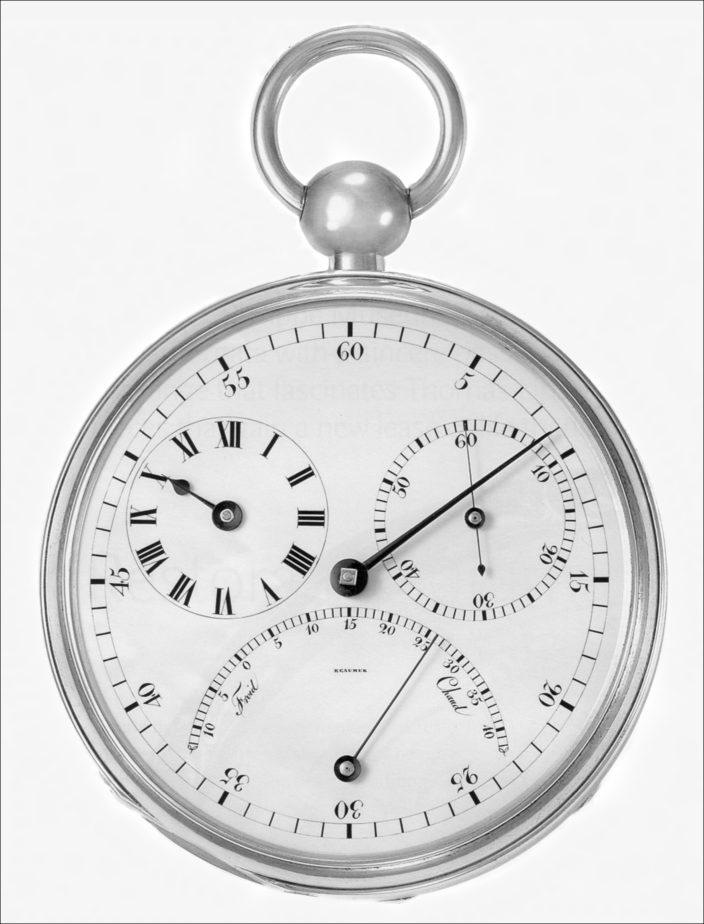

In [2]:
# load the original image
ori_img = load("Data/Fig0220(a).tif")
@printf "%s\n" summary(ori_img)
ori_img

由于dpi是一个跟打印有关的概念，这里就以原始图片为标准大小进行模拟
1. Downsample the original images 
对原图片进行下采样以降低分辨率

3692×2812 Array{Gray{N0f8},2} with eltype Gray{Normed{UInt8,8}}
887×675 Array{Gray{N0f8},2} with eltype Gray{Normed{UInt8,8}}
444×338 Array{Gray{N0f8},2} with eltype Gray{Normed{UInt8,8}}
213×162 Array{Gray{N0f8},2} with eltype Gray{Normed{UInt8,8}}


,,,

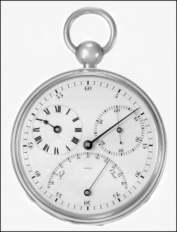
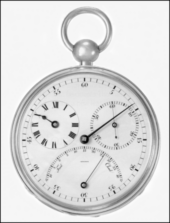
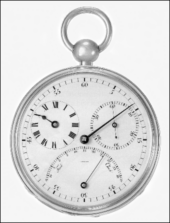
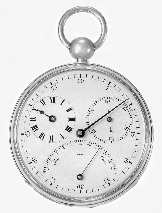

In [3]:
# downsample the original image

img_dpis = [1250, 300, 150, 72]
img_sizes = [ceil.(Int, dpi/1250 .* size(ori_img)) for dpi in img_dpis]
# for simplicity we use `imresize` here
downsampled_imgs = [imresize(ori_img, sz) for sz in img_sizes] 
[@printf "%s\n" summary(img) for img in downsampled_imgs]
downsampled_imgs

2. Upsample the downsampled images, so that images are shown in desired dpi 将下采样后的低分辨率图片放大到原始分辨率，从而使图片以想要的dpi显示出来

可以看出，图片打印时的dpi越低，打印效果越差

In [4]:
# upsample the downsampled images
upsampled_imgs = [imresize(img, size(ori_img)) for img in downsampled_imgs]

# combine four images into a new large image for show
# Row 1: 1250 300
# Row 2: 150 72
@printf "dpis of images are: \n%d\t%d\n%d\t%d\n" 1250 300 150 72
[imgs[1] imgs[2]; imgs[3] imgs[4]]

dpis of images are: 
1250	300
150	72


UndefVarError: UndefVarError: imgs not defined